## Setup

In [1]:
'''Locate the working directory'''
if __name__ == '__main__':    
    import sys
    from _path import workdir
    sys.path.append(workdir)
    print(sys.path[-1])

c:\Users\vince\OneDrive - Montana State University\python projects\py stellar perturbations\test\I_Love_Q\..\..


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.util.constants import G, c, msun
from src.static.tov import solve_tov
from src.eos.poly import eos_poly
from src.perturb.stationary.rot_gr import bvp_rot
from src.perturb.stationary.love_gr import bvp_love
from src.perturb.empirical.UR_fit import moi_love, Q_love

## Parameters

In [3]:
rho_list = np.logspace(14.5,16.,14)
pcut = 1.e20

## Compute background solution and then $k_2$, $I$ and $Q$

In [4]:
'''Initialize EOS'''
eos = eos_poly(k = 1.e35/(1.e15)**2, n = 1.)

'''Initialize TOV solver'''
tov=solve_tov(eos)

'''Initialize output arrays'''
m_list = np.empty_like(rho_list)
r_list = np.empty_like(rho_list)
moi_list = np.empty_like(rho_list)
love_list = np.empty_like(rho_list)
Q_list = np.empty_like(rho_list)

for idx, rho in enumerate(rho_list):
    '''Compute background'''
    tov.ivp(p0= eos.p(rho),pcut=pcut)
    m_list[idx] = tov.m[-1]
    r_list[idx] = tov.r[-1]
    '''Compute k2, and then rescaled Love'''
    cal_love = bvp_love(bsol = tov)
    k2 = cal_love.solve_Love()
    love_list[idx] = k2*2./3/(G*m_list[idx]/r_list[idx]/c**2)**5
    '''Compute I, Q, and then the rescaled I, Q'''
    cal_IQ = bvp_rot(bsol = tov)
    moi, Q = cal_IQ.solve_IQ()
    moi_list[idx] = G/c**2*moi/(G*m_list[idx]/c**2)**3
    Q_list[idx] = G/c**2*Q*(G*m_list[idx]/c**2)

### Plots

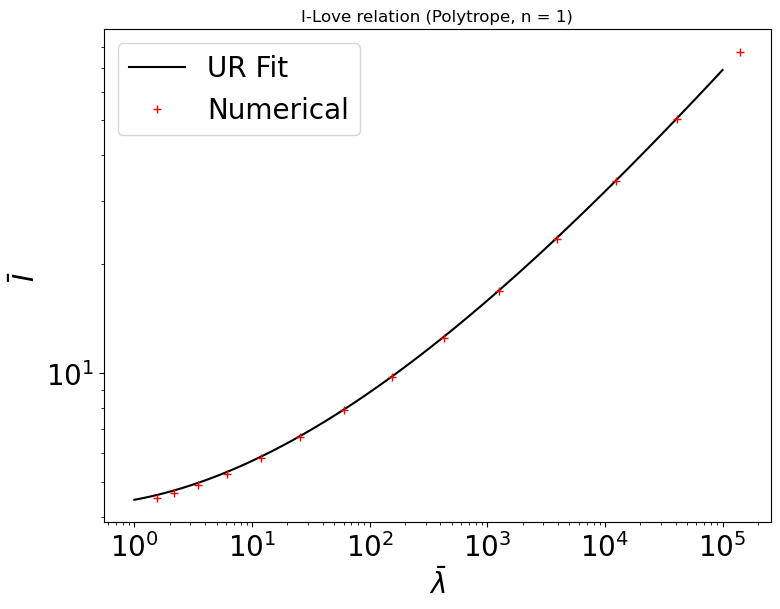

In [5]:
love_fit_list = np.logspace(0.,5.,100)

plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.plot(love_fit_list, moi_love(love_fit_list), 'k-', label = 'UR Fit')
plt.plot(love_list, moi_list, linestyle = '', marker = '+', color = 'red', label = 'Numerical')
plt.title(r'I-Love relation (Polytrope, n = 1)')
plt.xlabel(r'$\bar{\lambda}$',fontsize=20)
plt.ylabel(r'$\bar{I}$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20, frameon = 'True')
plt.show()
plt.close()

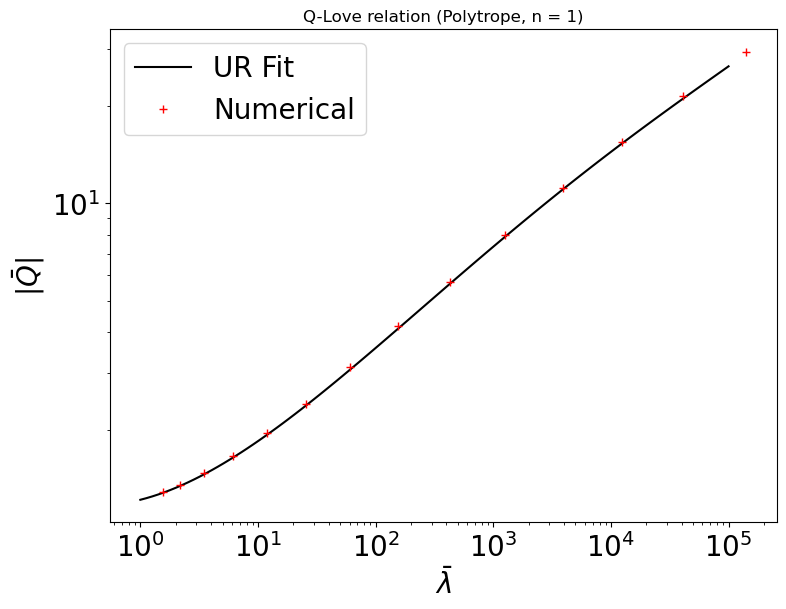

In [6]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.plot(love_fit_list, Q_love(love_fit_list), 'k-', label = 'UR Fit')
plt.plot(love_list, np.abs(Q_list), linestyle = '', marker = '+', color = 'red', label = 'Numerical')
plt.title(r'Q-Love relation (Polytrope, n = 1)')
plt.xlabel(r'$\bar{\lambda}$',fontsize=20)
plt.ylabel(r'$|\bar{Q}|$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20, frameon = 'True')
plt.show()
plt.close()

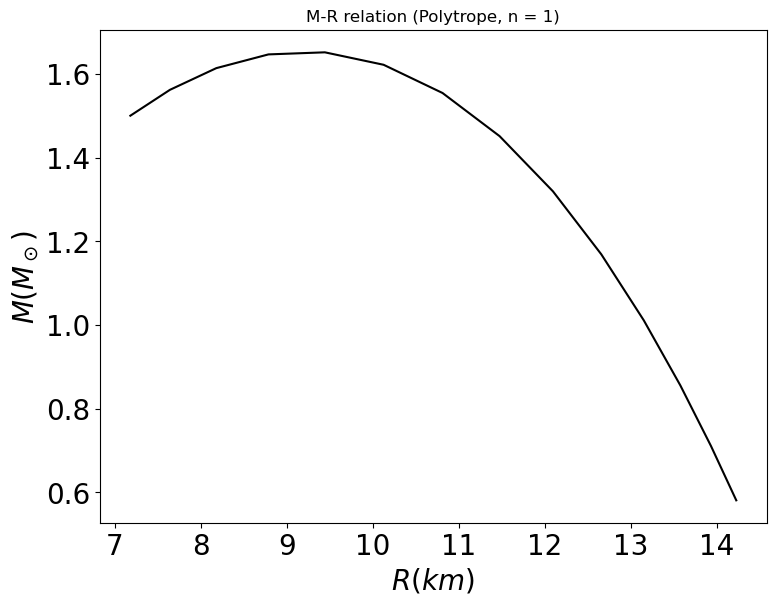

In [7]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.plot(r_list/1.e5, m_list/msun, 'k-')
plt.title(r'M-R relation (Polytrope, n = 1)')
plt.xlabel(r'$R (km)$',fontsize=20)
plt.ylabel(r'$M (M_\odot)$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.close()